In [1]:
!pip install antlr4-python3-runtime==4.9.2
!wget https://www.antlr.org/download/antlr-4.9.2-complete.jar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.2-py3-none-any.whl size=144548 sha256=5c032bdc64c0f7330da87161de8953e6acf8d0f131b9aa8393b060d81aa6eff4
  Stored in directory: /root/.cache/pip/wheels/af/c8/1f/dd6d90c5974896e85709e017986a6f72fcf32343bea042bc03
Successfully built antlr4-python3-runtime
--2024-05-22 03:57:15--  https://www.antlr.org/download/antlr-4.9.2-complete.jar
Resolving www.antlr.org (www.antlr.org)... 185.199.110.153, 185.199.108.153, 185.199.109.153, ...
Connecting to www.antlr.org (www.antlr.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2100564 (2.0M) [application/java-archive]
Saving to: ‘antlr-4.9.2-complete.jar’

antlr-4.9.2-complet 100%[===================>]   2.00M  --.-KB/s    in 0.07s   

2024-05-22 03:57:15 (28.9 MB/s) - ‘antlr-4.9.2-complete.jar’ saved [21

In [21]:
!java -jar antlr-4.9.2-complete.jar -Dlanguage=Python3 -visitor ParserT.g4
!java -jar antlr-4.9.2-complete.jar -Dlanguage=Python3 -visitor Expr.g4

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
from antlr4 import *
from ParserTLexer import ParserTLexer
from ParserTParser import ParserTParser
from antlr4.tree.Tree import TerminalNodeImpl

def visualize_parse_tree(input_text):
    input_stream = InputStream(input_text)
    lexer = ParserTLexer(input_stream)
    stream = CommonTokenStream(lexer)
    tokens = lexer.getAllTokens()
    print("Tokens:")
    for token in tokens:
      print(f"Type: {token.type}, Text: {token.text}")
    parser = ParserTParser(stream)
    tree = parser.program()



# Ejemplo de uso
while True:
  try:
    txt = input('> ')
    if txt!="fin":
      visualize_parse_tree(txt)
  except EOFError:
    break



> begin print(9) end


line 1:18 mismatched input '<EOF>' expecting 'begin'


Tokens:
Type: 1, Text: begin
Type: 3, Text: print
Type: 4, Text: (
Type: 6, Text: 9
Type: 5, Text: )
Type: 2, Text: end


KeyboardInterrupt: Interrupted by user

> begin print(9) end


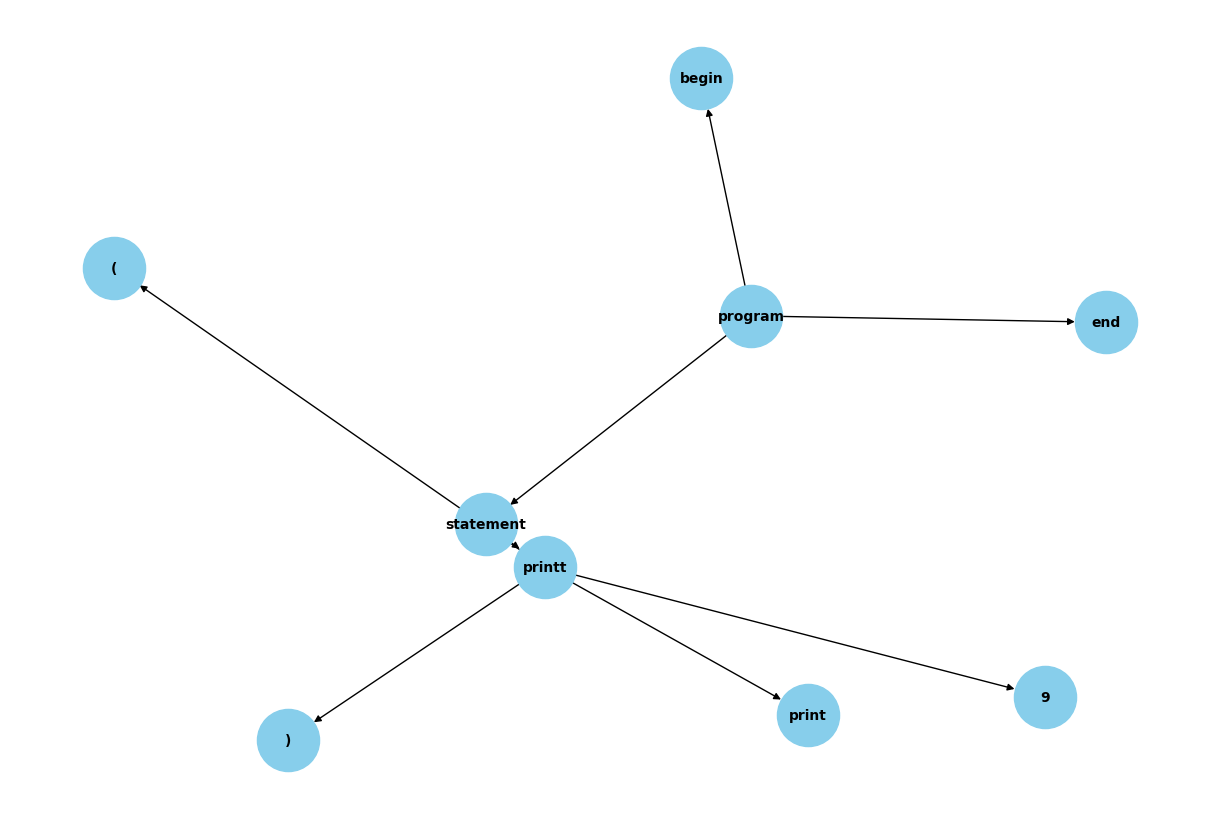

KeyboardInterrupt: Interrupted by user

In [23]:
#Versión Grafo Tree
import matplotlib.pyplot as plt
import networkx as nx
from antlr4 import *
from ParserTLexer import ParserTLexer
from ParserTParser import ParserTParser
from antlr4.tree.Tree import TerminalNodeImpl

def visualize_parse_tree(input_text):
    input_stream = InputStream(input_text)
    lexer = ParserTLexer(input_stream)
    stream = CommonTokenStream(lexer)
    #tokens = lexer.getAllTokens()
    #print("Tokens:")
    #for token in tokens:
    #  print(f"Type: {token.type}, Text: {token.text}")
    parser = ParserTParser(stream)
    tree = parser.program()

    G = nx.DiGraph()

    def add_nodes_edges(node, parent=None):
        if isinstance(node, TerminalNodeImpl):
            label = node.getText()
        else:
            label = parser.ruleNames[node.getRuleIndex()]

        node_id = str(id(node))
        G.add_node(node_id, label=label)

        if parent is not None:
            G.add_edge(parent, node_id)

        for i in range(node.getChildCount()):
            add_nodes_edges(node.getChild(i), node_id)

    # Agregar nodos y aristas comenzando desde la raíz
    add_nodes_edges(tree)

    # Dibujar el árbol
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

# Ejemplo de uso
while True:
  try:
    txt = input('> ')
    if txt!="fin":
      visualize_parse_tree(txt)
  except EOFError:
    break


> begin print(9) end
Tokens:
Type: 1, Text: begin
Type: 3, Text: print
Type: 4, Text: (
Type: 6, Text: 9
Type: 5, Text: )
Type: 2, Text: end


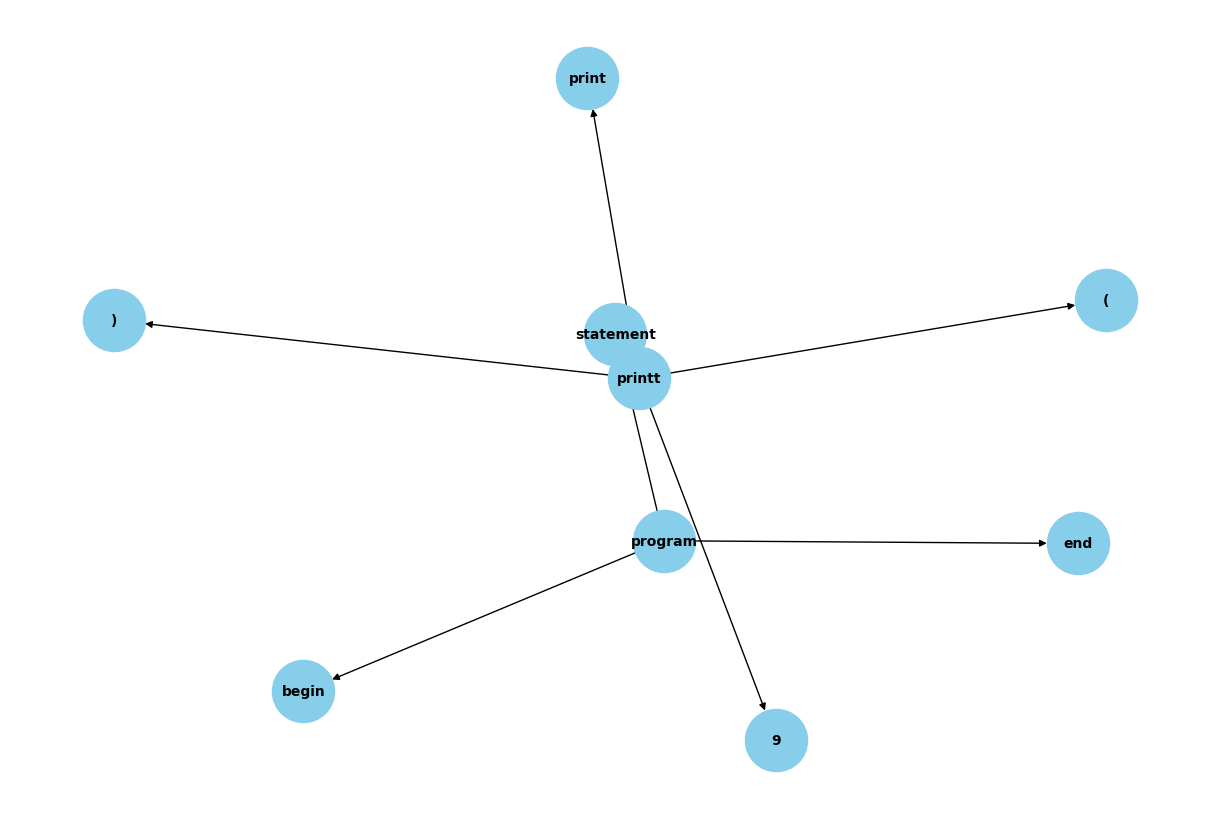

KeyboardInterrupt: Interrupted by user

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
from antlr4 import *
from ParserTLexer import ParserTLexer
from ParserTParser import ParserTParser
from antlr4.tree.Tree import TerminalNodeImpl

def visualize_parse_tree(input_text):
    input_stream = InputStream(input_text)
    lexer = ParserTLexer(input_stream)
    stream = CommonTokenStream(lexer)
    tokens = lexer.getAllTokens()

    print("Tokens:")
    for token in tokens:
        print(f"Type: {token.type}, Text: {token.text}")

    # Reset the input stream for the parser
    input_stream = InputStream(input_text)
    lexer = ParserTLexer(input_stream)
    stream = CommonTokenStream(lexer)

    parser = ParserTParser(stream)
    tree = parser.program()

    # Crear un grafo dirigido
    G = nx.DiGraph()

    def add_nodes_edges(node, parent=None):
        if isinstance(node, TerminalNodeImpl):
            label = node.getText()
        else:
            label = parser.ruleNames[node.getRuleIndex()]

        node_id = str(id(node))
        G.add_node(node_id, label=label)

        if parent is not None:
            G.add_edge(parent, node_id)

        for i in range(node.getChildCount()):
            add_nodes_edges(node.getChild(i), node_id)

    # Agregar nodos y aristas comenzando desde la raíz
    add_nodes_edges(tree)

    # Dibujar el árbol
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

# Ejemplo de uso
while True:
    try:
        txt = input('> ')
        if txt.lower() == "fin":
            break
        visualize_parse_tree(txt)
    except EOFError:
        break


> 2+2


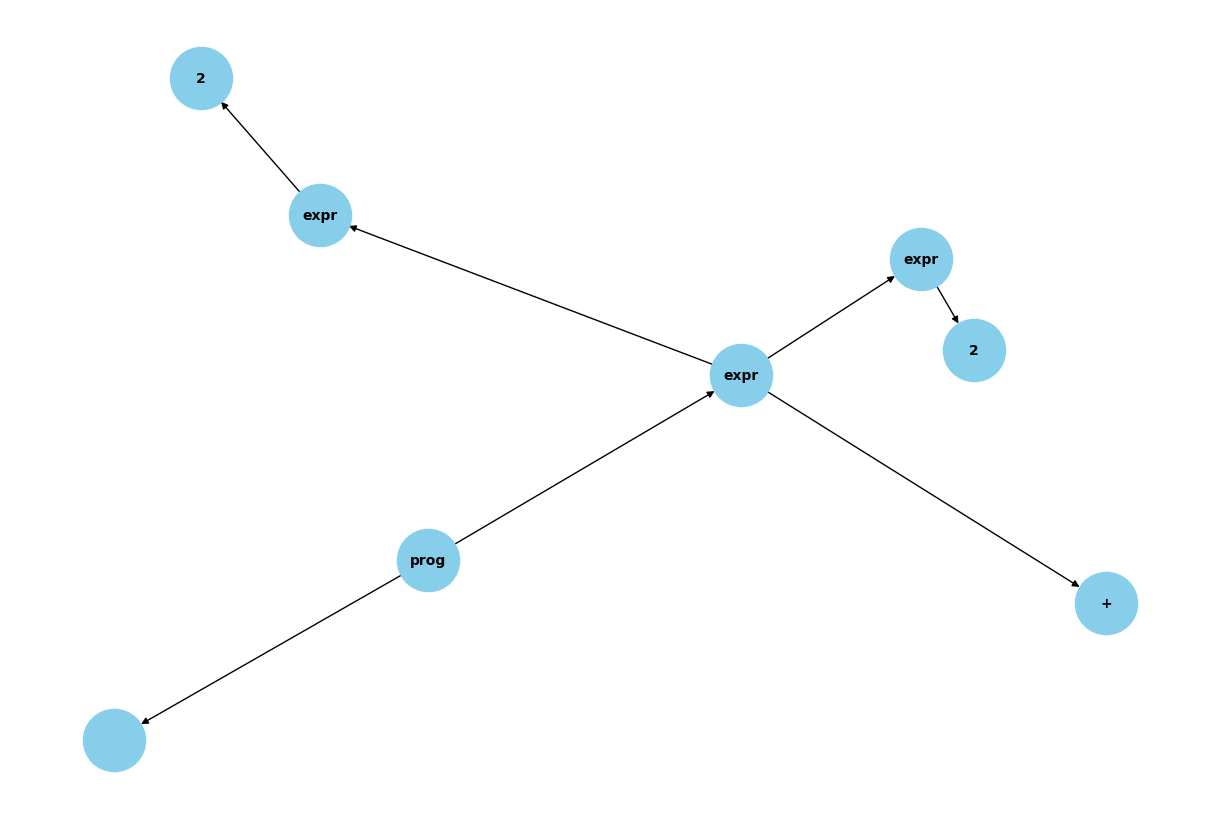

KeyboardInterrupt: Interrupted by user

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from antlr4 import *
from ExprLexer import ExprLexer
from ExprParser import ExprParser
from antlr4.tree.Tree import TerminalNodeImpl

def visualize_parse_tree(input_text):
    input_stream = InputStream(input_text + '\n')
    lexer = ExprLexer(input_stream)
    stream = CommonTokenStream(lexer)
    parser = ExprParser(stream)
    tree = parser.prog()

    # Crear un grafo dirigido
    G = nx.DiGraph()

    def add_nodes_edges(node, parent=None):
        if isinstance(node, TerminalNodeImpl):
            label = node.getText()
        else:
            label = parser.ruleNames[node.getRuleIndex()]

        node_id = str(id(node))
        G.add_node(node_id, label=label)

        if parent is not None:
            G.add_edge(parent, node_id)

        for i in range(node.getChildCount()):
            add_nodes_edges(node.getChild(i), node_id)

    # Agregar nodos y aristas comenzando desde la raíz
    add_nodes_edges(tree)

    # Dibujar el árbol
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

# Ejemplo de uso
while True:
  try:
    txt = input('> ')
    if txt!="end":
      visualize_parse_tree(txt)
  except EOFError:
    break



In [33]:
import matplotlib.pyplot as plt
import networkx as nx

import antlr4
from antlr4 import *
from ExprLexer import ExprLexer
from ExprParser import ExprParser
from ExprVisitor import ExprVisitor
from antlr4.tree.Trees import Trees
from antlr4.tree.Tree import TerminalNodeImpl

class MyListener(ParseTreeListener):
    def enterEveryRule(self, ctx):
        print(type(ctx).__name__)

class EvalVisitor(ExprVisitor):
    def visitProg(self, ctx):
        results = []
        for child in ctx.getChildren():
            result = self.visit(child)
            if result is not None:
                results.append(result)
        return results

    def visitExpr(self, ctx):
        if ctx.getChildCount() == 3:
            left = self.visit(ctx.getChild(0))
            right = self.visit(ctx.getChild(2))
            op = ctx.getChild(1).getText()
            if op == '*':
                return left * right
            elif op == '/':
                return left / right
            elif op == '+':
                return left + right
            elif op == '-':
                return left - right
        elif ctx.getChildCount() == 1:
            return int(ctx.getChild(0).getText())
        elif ctx.getChildCount() == 2:
            # handle parenthesis
            return self.visit(ctx.getChild(1))

def main():
    while True:
        try:
            input_stream = InputStream(input('> ')+ '\n')
            lexer = ExprLexer(input_stream)
            stream = CommonTokenStream(lexer)
            parser = ExprParser(stream)
            tree = parser.prog()
            visitor = EvalVisitor()
            results = visitor.visit(tree)
            for result in results:
                print(result)
        except EOFError:
            break
if __name__ == '__main__':
    main()

> 2*2
4


KeyboardInterrupt: Interrupted by user